# regex實戰-3: 台灣郵遞區號比對篇

## 目標
* 在一篇文章中找出台灣3+3郵遞區號。
* 3+3郵遞區號的特徵是連續6個數字，這裡先不考慮是否有些位置只會出現某些數字問題。
* 輸入文章中有些像電話號碼、公司統一編號等超過6位的數字。注意不能誤將這些資料中的6個數字當作郵遞區號。意思是要「剛好」連續6個數字，不足或超過6個數字的都得排除。

## 技術
* 比對有長度限制的字串，基本上須用環視(look-around)技術。
* 本篇使用的環視是negative lookahead以及negative behind。
* 筆者有嘗試使用positive的環視，但達不到效果。限制長度，negative環視才是正確選擇。

## 侷限
* lookbehind環視使用上有個限制：長度必須固定(A lookbehind assertion has to be fixed width)，諸如 ```(?<!\d*)```，```(?<=(\d{2}|-))``` 等都是不正確的pattern。

In [1]:
import re
from datetime import datetime

now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(
    f"'re' module imported.\n"
    f'{now}'
)

're' module imported.
2021-09-25 14:52:55


In [2]:
zip = r'(\d{6})'

patterns = [
    {
      'text': zip,
      'description': 'pattern太過寬鬆，一些不相干的數字也「不小心」匹配。'
    },
    {
      'text': rf'\D{zip}\D',
      'description': '行首和行末的郵遞區號抓不出來。'
    },
    {
      'text': rf'\b{zip}\b',
      'description': '行首和行中的郵遞區號比對不到。'
    },
    {
      'text': rf'(?<!(?:\d|-)){zip}(?!\d)',
      'description': 'Bingo!'
    },
]
test_str = '''116238台北市文山區木柵路三段105巷6弄19號3樓
身高168.500公分，體重68.5000公斤。
行內郵遞區號317028也可以匹配得到，本文總共應該有3個匹配。
室內電話：02-22381265，手機0923-901447
統一編號03497720 看能否比對到行末的郵遞區號：485305'''

for pattern in patterns:
    print(f'pattern: {pattern["text"]:30}{pattern["description"]}')
    matches = re.findall(pattern=pattern['text'], string=test_str, flags=(re.IGNORECASE | re.MULTILINE))
    for match in matches:
        print(match, end='\t')
    print('\n-----')
# 正確匹配： 116238  317028  485305

pattern: (\d{6})                       pattern太過寬鬆，一些不相干的數字也「不小心」匹配。
116238	317028	223812	901447	034977	485305	
-----
pattern: \D(\d{6})\D                   行首和行末的郵遞區號抓不出來。
317028	901447	
-----
pattern: \b(\d{6})\b                   行首和行中的郵遞區號比對不到。
901447	485305	
-----
pattern: (?<!(?:\d|-))(\d{6})(?!\d)    Bingo!
116238	317028	485305	
-----


<!-- 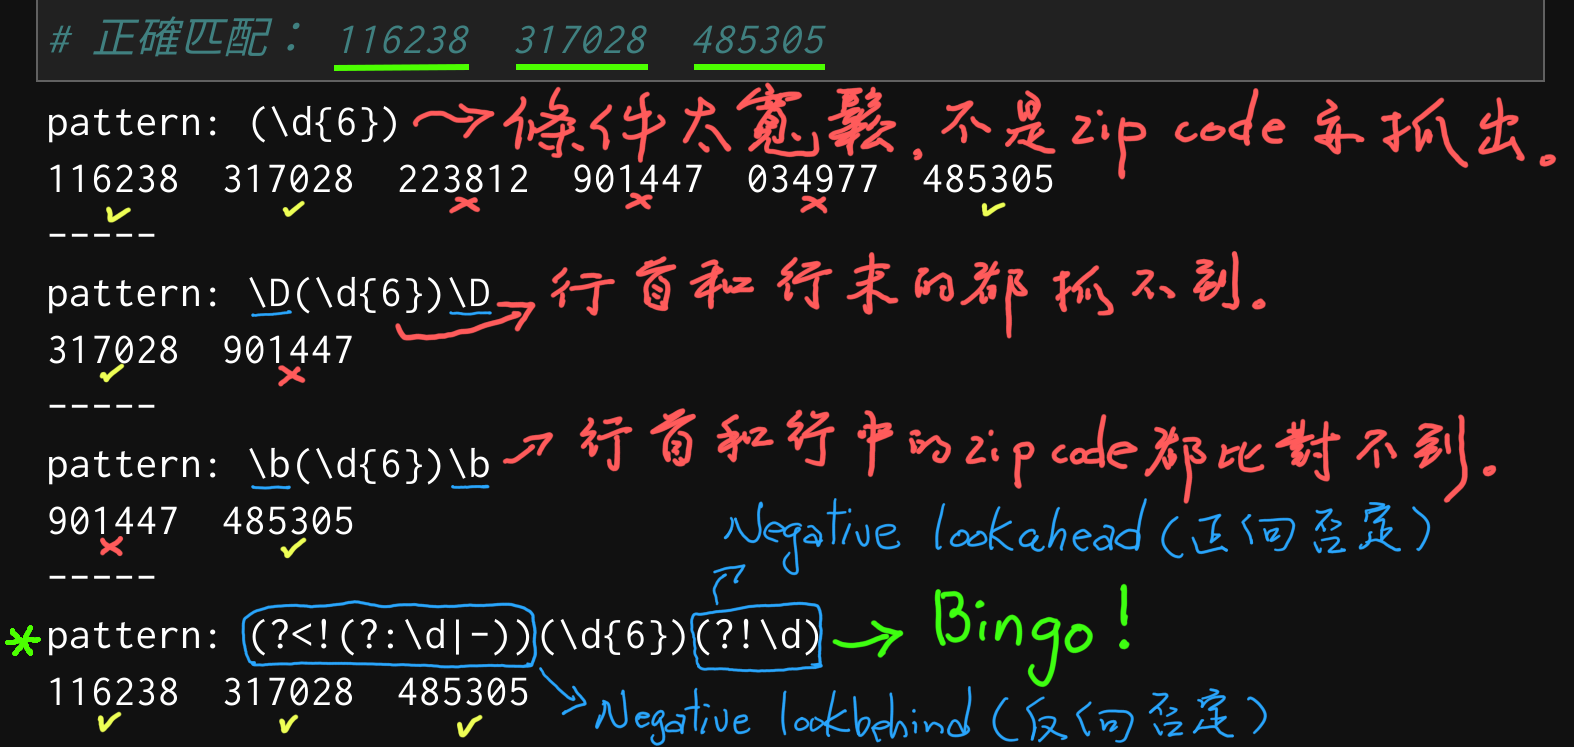
 -->
<!-- ![](./zip_code-1.png) -->
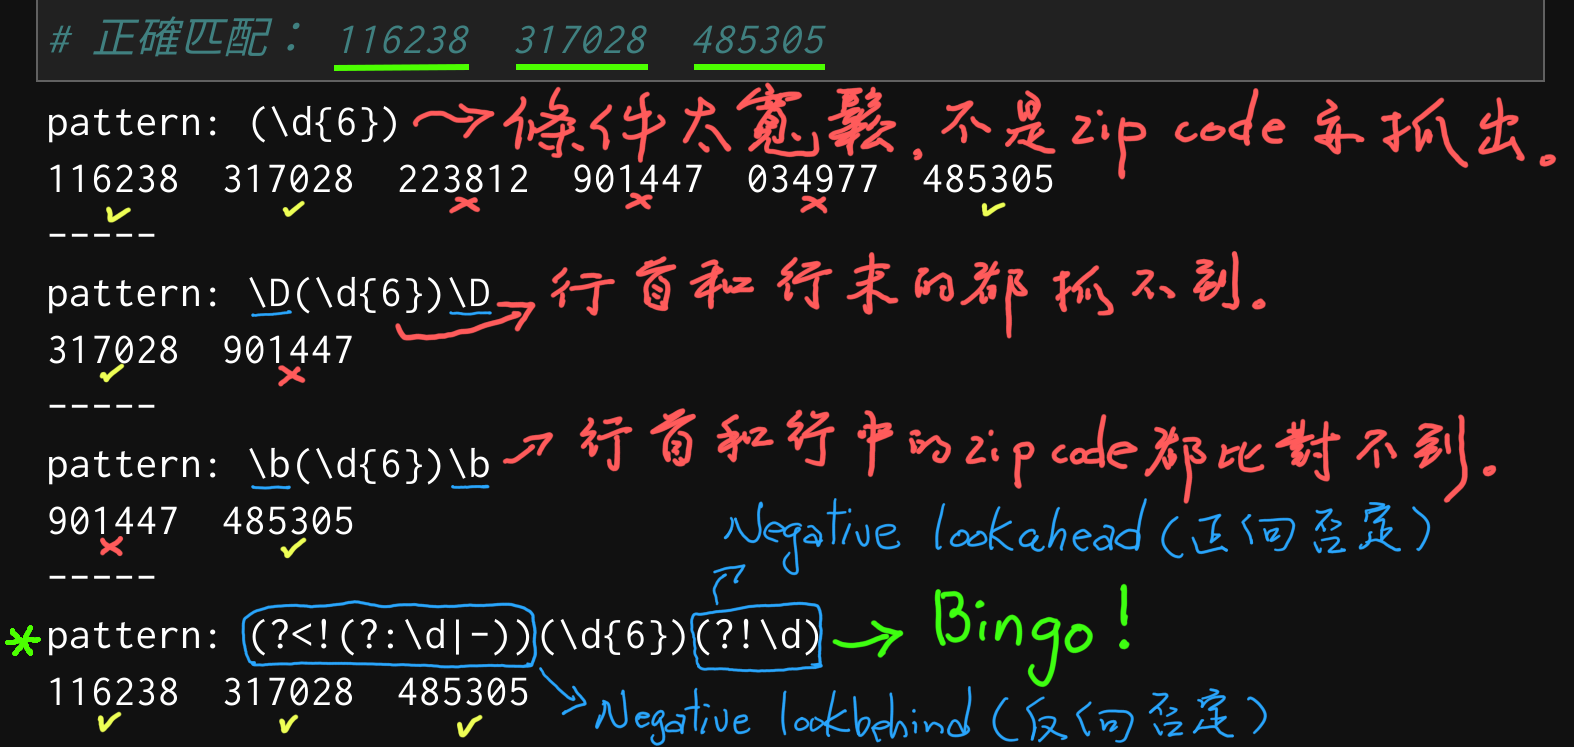